C:\Users\aparn\AppData\Local\Temp\ipykernel_46684\2663168919.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\aparn\AppData\Local\Temp\ipykernel_46684\2663168919.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

scikit-learn model metrics:
Accuracy=0.8045, Precision=0.7931, Recall=0.6667, F1=0.7244, ROC-AUC=0.8433

scikit-learn coefficients:
Intercept: -0.656937
Pclass: -0.928698
Sex: -1.269598
Age: -0.502878
Fare: 0.099599
SibSp: -0.262672
Parch: -0.067158
Embarked_Q: 0.080683
Embarked_S: -0.171784


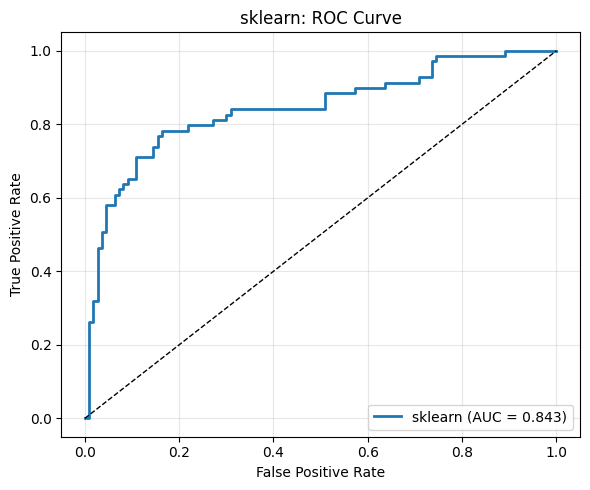

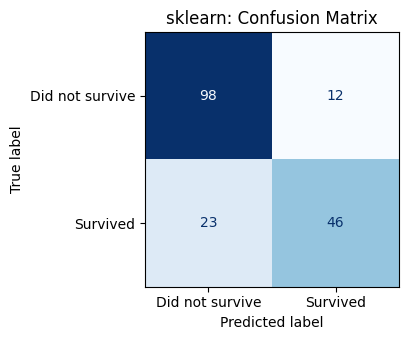

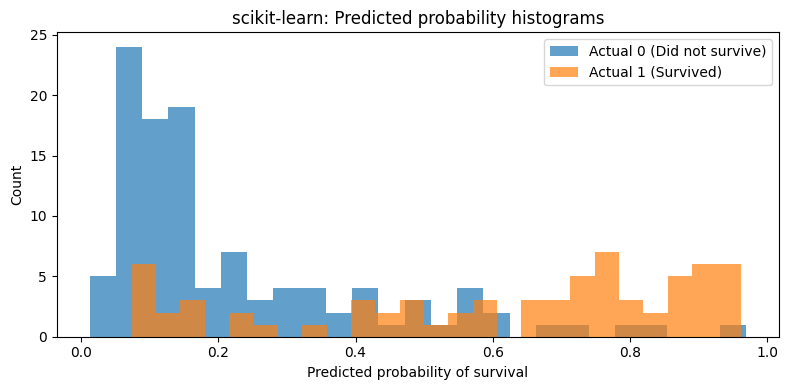

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay)

CSV_PATH = r"C:\Users\aparn\Downloads\titanic\train.csv"
RANDOM_STATE = 42
TEST_SIZE = 0.2

df = pd.read_csv(CSV_PATH)
features = ["Pclass", "Sex", "Age", "Fare", "SibSp", "Parch", "Embarked"]
df = df[features + ["Survived"]].copy()
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Fare"].fillna(df["Fare"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
df["Sex"] = df["Sex"].map({"male":1,"female":0})
df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)

X_df = df.drop(columns=["Survived"])
feature_names = X_df.columns.tolist()
X = X_df.values.astype(float)
y = df["Survived"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y
)
scaler = StandardScaler()
Xtr = scaler.fit_transform(X_train)
Xte = scaler.transform(X_test)

model = LogisticRegression(max_iter=5000)
model.fit(Xtr, y_train)

proba = model.predict_proba(Xte)[:,1]
pred = (proba >= 0.5).astype(int)

acc = accuracy_score(y_test, pred)
prec = precision_score(y_test, pred, zero_division=0)
rec = recall_score(y_test, pred, zero_division=0)
f1 = f1_score(y_test, pred, zero_division=0)
auc_score = roc_auc_score(y_test, proba)

print("scikit-learn model metrics:")
print(f"Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, F1={f1:.4f}, ROC-AUC={auc_score:.4f}")

intercept = float(model.intercept_[0])
coefs = model.coef_.ravel()
print("\nscikit-learn coefficients:")
print(f"Intercept: {intercept:.6f}")
for fname, val in zip(feature_names, coefs):
    print(f"{fname}: {val:.6f}")

fpr, tpr, _ = roc_curve(y_test, proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"sklearn (AUC = {roc_auc:.3f})", linewidth=2)
plt.plot([0,1],[0,1],'k--', linewidth=1)
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("sklearn: ROC Curve"); plt.legend(loc="lower right"); plt.grid(alpha=0.3)
plt.tight_layout(); plt.savefig("sklearn_titanic_roc.png", dpi=300, bbox_inches="tight")
plt.show()

cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["Did not survive","Survived"])
fig, ax = plt.subplots(figsize=(4.5,3.5))
disp.plot(ax=ax, cmap="Blues", colorbar=False)
plt.title("sklearn: Confusion Matrix"); plt.tight_layout()
plt.savefig("sklearn_titanic_confusion.png", dpi=300, bbox_inches="tight")
plt.show()

plt.figure(figsize=(8,4))
plt.hist(proba[y_test==0], bins=25, alpha=0.7, label="Actual 0 (Did not survive)")
plt.hist(proba[y_test==1], bins=25, alpha=0.7, label="Actual 1 (Survived)")
plt.title("scikit-learn: Predicted probability histograms")
plt.xlabel("Predicted probability of survival")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.savefig("sklearn_titanic_prob_hist.png", dpi=300, bbox_inches="tight")
plt.show()
